# Removing regional contribution

This code does a simple polynomial fitting for weightened real data.

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from fatiando.vis import mpl
from IPython.display import Image as img

# Input

### Importing Diorama TFA data

In [57]:
xp, yp, zp, dobs = np.loadtxt('diorama_tfa.txt', usecols=(0,1,2,5), unpack=True)

# Fitting

In [58]:
A = np.vstack((np.ones(xp.size), xp, yp)).T

### Weightening

In [77]:
dist = np.sqrt((xp - 8212800.)**2. + (yp - 478200.)**2.)
W = np.ones_like(xp)
W[np.argwhere(dist<=3000.)] = 0.02

In [78]:
p = np.linalg.solve(np.dot(A.T*W,A),np.dot(A.T*W,dobs))

In [79]:
print p

[ -2.42539707e+05   2.95677476e-02  -1.92299892e-04]


In [80]:
regional = np.dot(A,p)

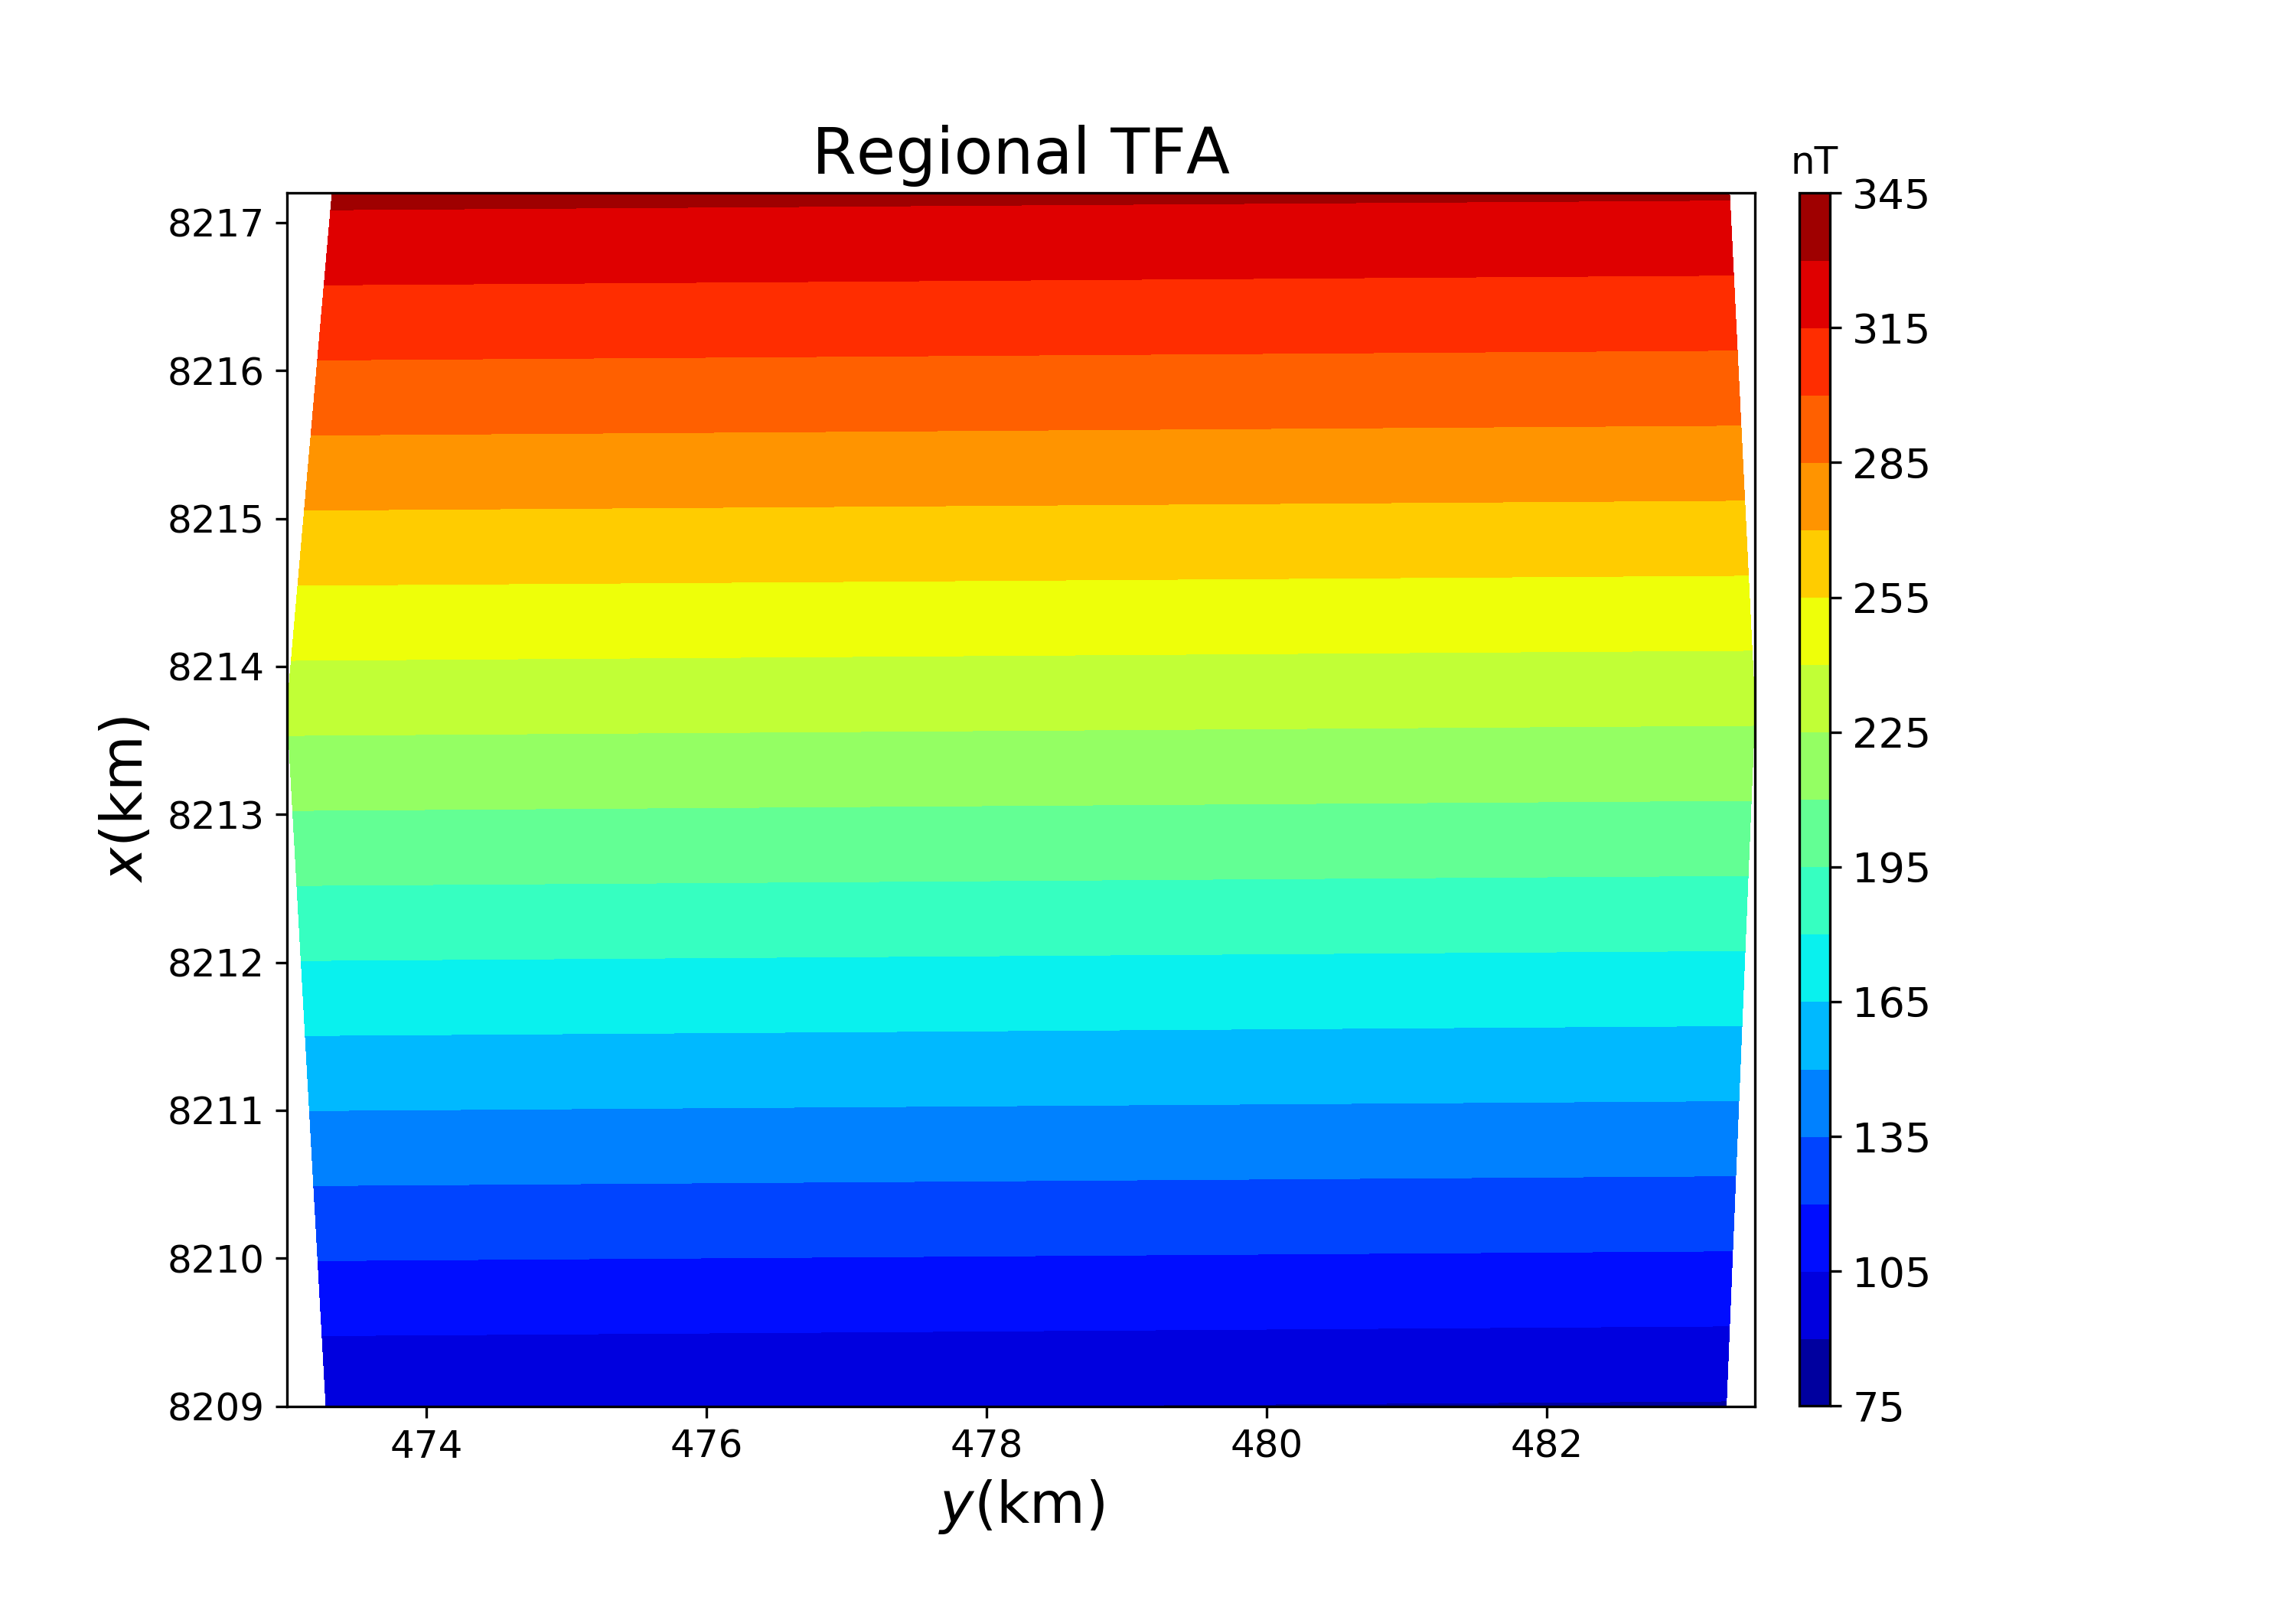

In [81]:
plt.figure(figsize=(10,7))
plt.title('Regional TFA', fontsize=20)
plt.tricontourf(yp, xp, regional, 20, cmap='jet').ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
#clines = plt.tricontour(yp, xp, dobs, 20, colors='k', linewidths=0.2)
plt.clabel(clines, fontsize=4, fmt='%3d')
mpl.m2km()
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1, edgecolor='black')
plt.savefig('regional.png', dpi=300)
#plt.show()
img(filename='regional.png', width=1000, height=1200)

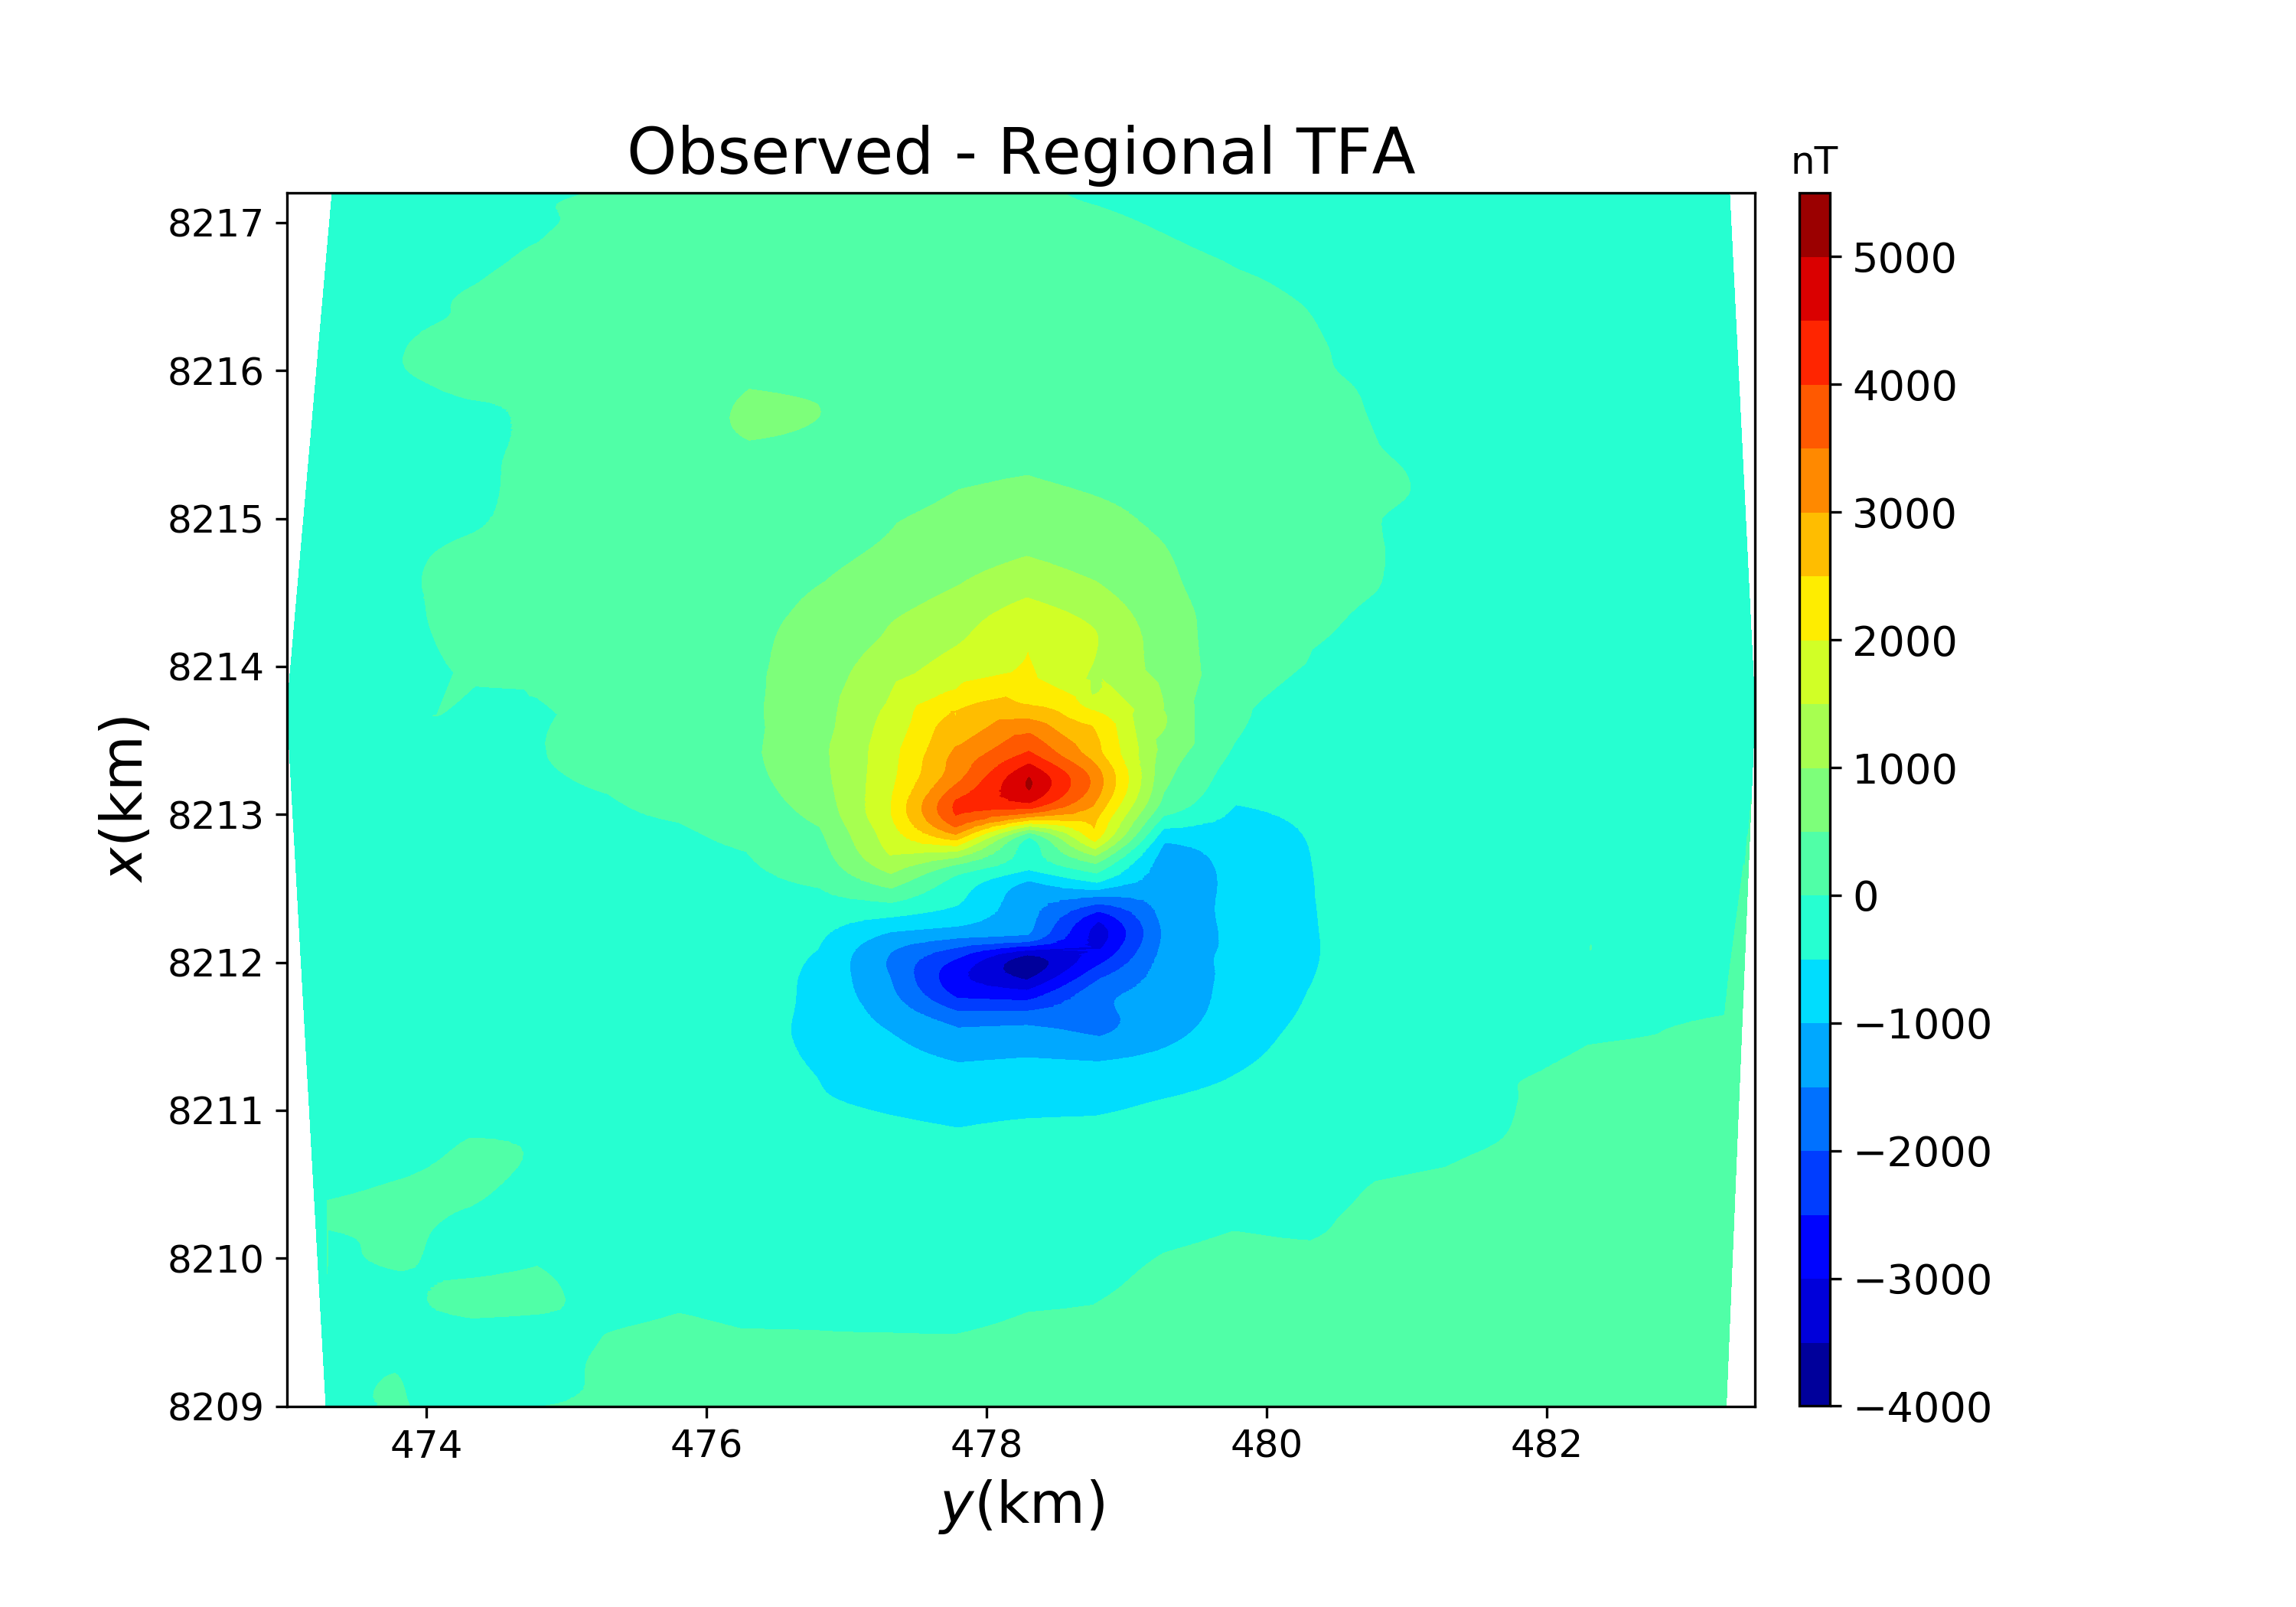

In [82]:
plt.figure(figsize=(10,7))
plt.title('Observed - Regional TFA', fontsize=20)
plt.tricontourf(yp, xp, dobs - regional, 20, cmap='jet').ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
#clines = plt.tricontour(yp, xp, dobs, 20, colors='k', linewidths=0.2)
plt.clabel(clines, fontsize=4, fmt='%3d')
mpl.m2km()
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1, edgecolor='black')
plt.savefig('obs_regional.png', dpi=300)
#plt.show()
img(filename='obs_regional.png', width=1000, height=1200)

In [76]:
out = np.vstack((xp, yp, zp, dobs-regional)).T

In [55]:
np.savetxt('TFA_obs_regional.txt', out, delimiter=' ', fmt='%1.8f')